In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

In [6]:
import numpy as np
import pandas as pd

In [8]:
coffee_production = pd.read_csv('/Users/puchku-home/Study/Python Libs/Data Viz with Matplotlib & Seaborn/Data/coffee/total-production.csv').T
coffee_production.columns = coffee_production.iloc[0]
coffee_production = coffee_production.drop("total_production")

coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [10]:
coffee_production.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1990 to 2018
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Angola                            29 non-null     object
 1   Bolivia (Plurinational State of)  29 non-null     object
 2   Brazil                            29 non-null     object
 3   Burundi                           29 non-null     object
 4   Ecuador                           29 non-null     object
 5   Indonesia                         29 non-null     object
 6   Madagascar                        29 non-null     object
 7   Malawi                            29 non-null     object
 8   Papua New Guinea                  29 non-null     object
 9   Paraguay                          29 non-null     object
 10  Peru                              29 non-null     object
 11  Rwanda                            29 non-null     object
 12  Timor-Leste             

In [12]:
top10_producers = coffee_production.sum().sort_values(ascending=False).iloc[:10]


In [14]:
top10_producers.head()

total_production
Brazil       1190965.7353
Viet Nam      439540.9519
Colombia      345871.4464
Indonesia     245116.7707
Ethiopia      141542.8931
dtype: object

/var/folders/ht/lcgnytjx5js3222vs1k678s80000gn/T/ipykernel_3735/368336241.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top10_producers.index.str[:2].str.upper())


[Text(0, 0, 'BR'),
 Text(1, 0, 'VI'),
 Text(2, 0, 'CO'),
 Text(3, 0, 'IN'),
 Text(4, 0, 'ET'),
 Text(5, 0, 'IN'),
 Text(6, 0, 'ME'),
 Text(7, 0, 'GU'),
 Text(8, 0, 'HO'),
 Text(9, 0, 'UG')]

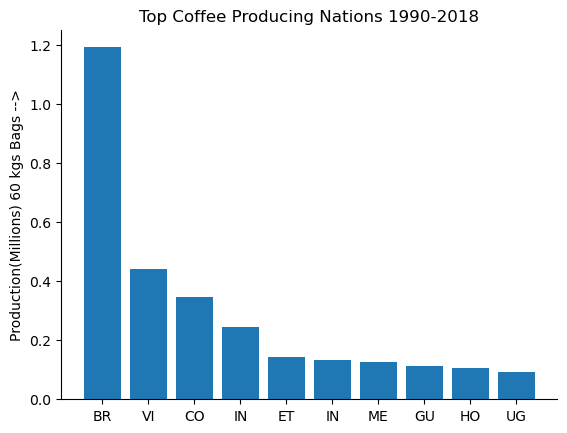

In [16]:
fig ,ax  = plt.subplots()

ax.bar(
    top10_producers.index,
    top10_producers/1000000
)

ax.spines[['top','right']].set_visible(False)
ax.set_ylabel("Production(Millions) 60 kgs Bags -->")
ax.set_title('Top Coffee Producing Nations 1990-2018')


ax.set_xticklabels(top10_producers.index.str[:2].str.upper())

In [18]:
top5 = coffee_production.loc[:, ["Brazil", "Viet Nam", "Colombia", "Indonesia", "Ethiopia"]]
top5.index = top5.index.astype("datetime64[ns]")

top5.head()

total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia
1990-01-01,27285.6286,1310.288,14396.0,7441.383,2909.451
1991-01-01,27293.4934,1437.848,17980.397,8493.196,2924.664
1992-01-01,34603.3542,2340.447,14946.878,5569.478,1825.171
1993-01-01,28166.9786,3020.216,11422.422,6743.288,2967.004
1994-01-01,28192.047,3631.609,12964.0,5367.878,2762.73


Text(0.5, 1.0, 'Viet Nam Surges to Number 2 Spot')

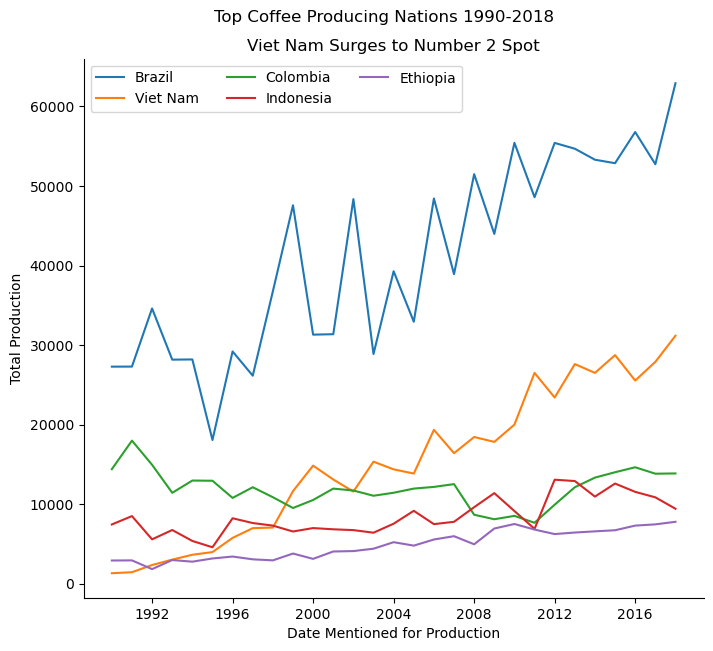

In [20]:
fig ,ax = plt.subplots(figsize=(8,7))
ax.plot(top5.index,top5)

ax.legend(top5.columns,ncol=3)
ax.set_xlabel("Date Mentioned for Production")
ax.set_ylabel("Total Production")

ax.spines[['top','right']].set_visible(False)
fig.suptitle("Top Coffee Producing Nations 1990-2018",y=0.95)
ax.set_title("Viet Nam Surges to Number 2 Spot")

In [22]:
brazil_vs_others = (coffee_production
                    .assign(rest_of_world = coffee_production
                            .drop("Brazil", axis=1).sum(axis=1))
                    .loc[:, ["Brazil", "rest_of_world"]]
                    .astype({"Brazil": "float64"})
                   )

brazil_vs_others

total_production,Brazil,rest_of_world
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.0470,65121.147
1995,18060.2022,69257.256
1996,29196.7430,74105.853
1997,26148.0040,73713.195
1998,36760.8533,72131.3598
1999,47577.8065,83805.9902


In [24]:
brazil_vs_others.dtypes

total_production
Brazil           float64
rest_of_world     object
dtype: object

In [26]:
brazil_vs_others["rest_of_world"] = pd.to_numeric(brazil_vs_others["rest_of_world"], errors='coerce')

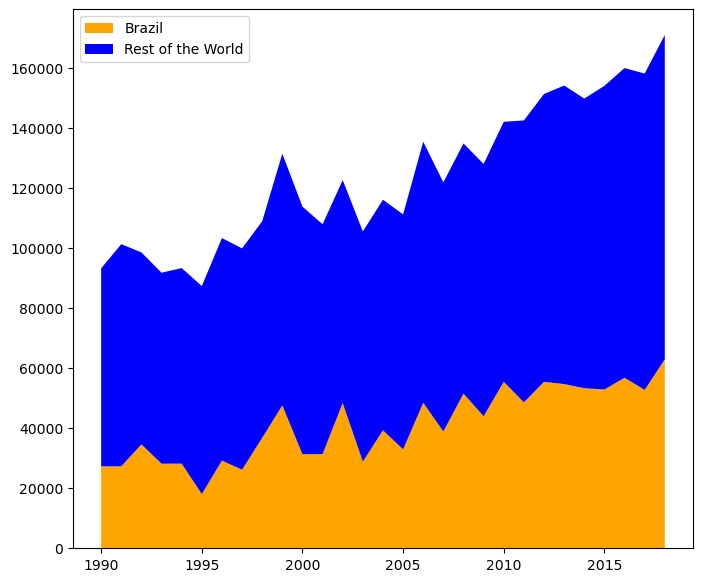

In [28]:
fig,ax = plt.subplots(figsize=(8,7))
color=["orange","blue"]
ax.stackplot(
    brazil_vs_others.index,
    brazil_vs_others['Brazil'],
    brazil_vs_others['rest_of_world'],
    colors=color,
    labels=["Brazil","Rest of the World"]
)

ax.legend()

ax.set_xticks(brazil_vs_others.index[::5])

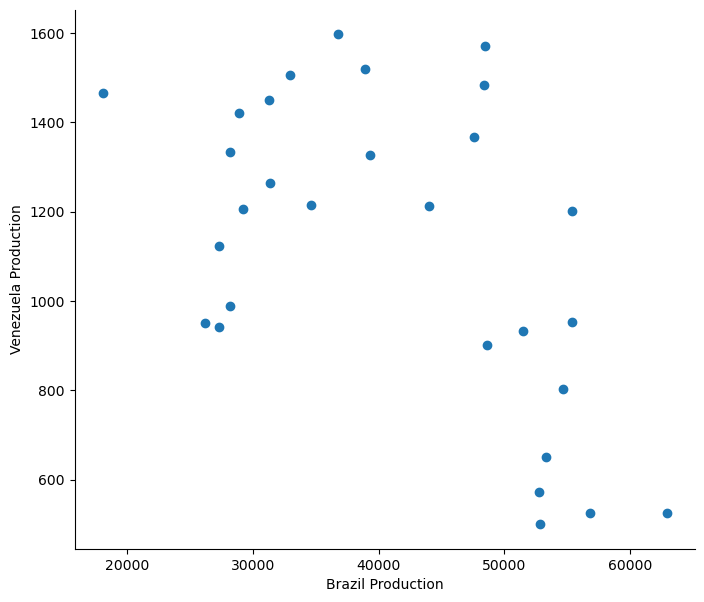

In [30]:
fig,ax = plt.subplots(figsize=(8,7))

ax.scatter(
    x=coffee_production["Brazil"],
    y=coffee_production["Venezuela"]
)

ax.set_xlabel('Brazil Production')
ax.set_ylabel('Venezuela Production')

ax.spines[['top','right']].set_visible(False)

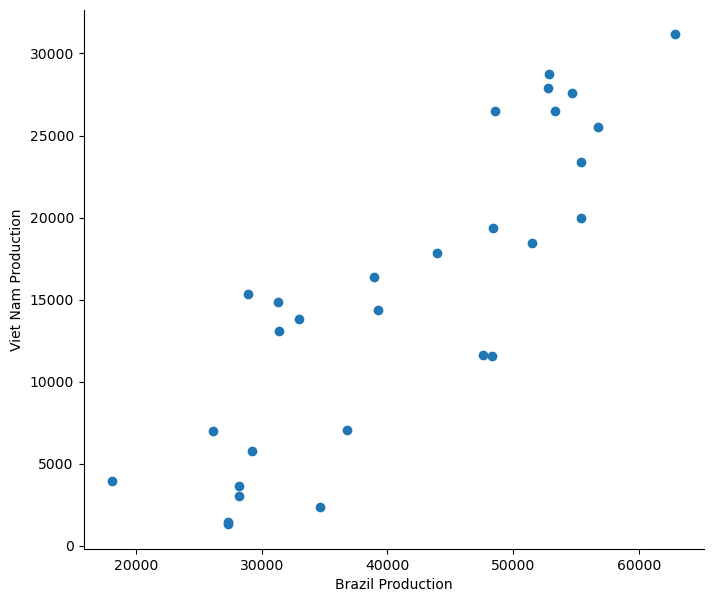

In [32]:
fig,ax = plt.subplots(figsize=(8,7))

ax.scatter(
    x=coffee_production["Brazil"],
    y=coffee_production["Viet Nam"]
)

ax.set_xlabel('Brazil Production')
ax.set_ylabel('Viet Nam Production')

ax.spines[['top','right']].set_visible(False)

In [34]:
coffee_production["Rest of World"] = coffee_production.drop(["Brazil", 
                                                             "Viet Nam", 
                                                             "Colombia", 
                                                             "Indonesia",
                                                             "Ethiopia",], axis=1).sum(axis=1)

coffee_production_top5_2018 = coffee_production.loc['2018', ["Brazil", 
                                                             "Viet Nam", 
                                                             "Colombia", 
                                                             "Indonesia",
                                                             "Ethiopia",
                                                             "Rest of World"
                                                            ]
                                                   ]

coffee_production_top5_2018

total_production
Brazil           62924.8836
Viet Nam         31174.0742
Colombia          13857.962
Indonesia         9417.5942
Ethiopia          7776.2234
Rest of World    45786.0003
Name: 2018, dtype: object

([<matplotlib.patches.Wedge at 0x177338cb0>,
 [Text(-1.0069294593736549, 0.4428239648500059, 'Brazil'),
  Text(-0.27821579027438637, -1.0642349242728313, 'Viet Nam'),
  Text(0.5953805067507464, -0.924944350856431, 'Colombia'),
  Text(0.9254415598986636, -0.5946073655886954, 'Indonesia'),
  Text(1.0644036782304531, -0.2775694683668974, 'Ethiopia'),
  Text(0.8201979034736394, 0.7329907224088492, 'Rest of World')],
 [Text(-0.6865428132093101, 0.30192543057954946, '37%'),
  Text(-0.18969258427799068, -0.7256147210951122, '18%'),
  Text(0.40594125460278163, -0.6306438755839302, '8%'),
  Text(0.6309828817490888, -0.4054141129013832, '6%'),
  Text(0.7257297806116725, -0.18925191025015728, '5%'),
  Text(0.5592258432774814, 0.49976640164239716, '27%')])

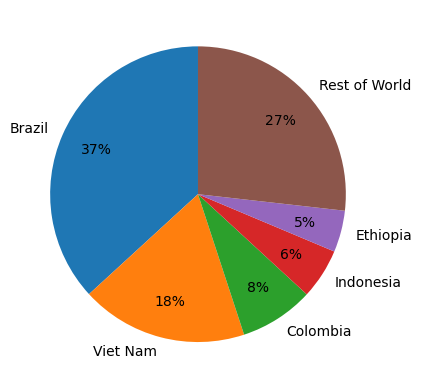

In [36]:
fig,ax = plt.subplots()

ax.pie(
    x=coffee_production_top5_2018,
    labels=coffee_production_top5_2018.index,
    startangle=90,
    autopct="%.0f%%",
    pctdistance=0.75
)

In [38]:
brazil_vs_others = (coffee_production
                    .assign(rest_of_world = coffee_production
                            .drop("Brazil", axis=1).sum(axis=1))
                    .loc[:, ["Brazil", "rest_of_world"]]
                    .astype({"Brazil": "float64"})
                   )


brazil_vs_others

total_production,Brazil,rest_of_world
1990,27285.6286,105831.74
1991,27293.4934,117110.277
1992,34603.3542,103163.116
1993,28166.9786,103042.356
1994,28192.0470,105516.077
1995,18060.2022,113867.657
1996,29196.7430,120052.349
1997,26148.0040,117647.31
1998,36760.8533,116119.3556
1999,47577.8065,136127.7035


Text(0.5, 1.0, 'Brazil Share of Global Production 1990')

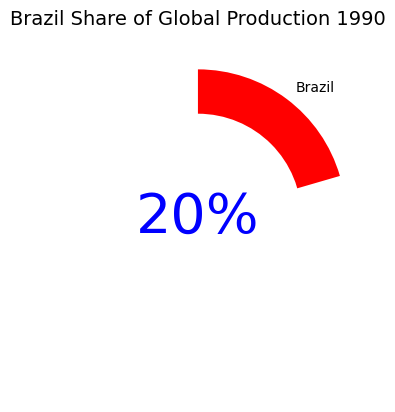

In [40]:
fig ,ax = plt.subplots()

ax.pie(
    x=brazil_vs_others.iloc[0].sort_values(ascending=False),
    #autopct="%.0f%%",
    labels=["","Brazil"],
    pctdistance = 0.85,
    startangle=90,
    colors=["white","red"]
)


donut_hole=plt.Circle((0,0),0.7,facecolor="white")
fig=plt.gcf()
ax=fig.gca()

ax.add_artist(donut_hole)

plt.text(
    0,
    0,
    s="20%", # string or message
    ha="center",
    va="center",
    fontsize = 40,
    color="blue"
)


ax.set_title("Brazil Share of Global Production 1990", fontsize=14)

Text(0.5, 1.0, 'Brazil Share of Global Production 2018')

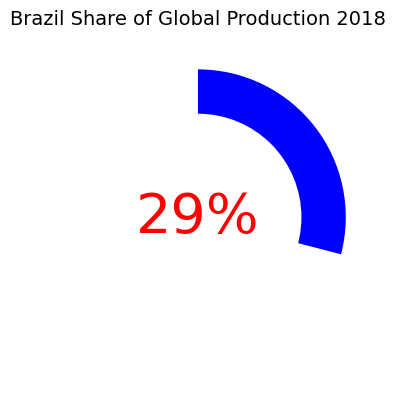

In [42]:
fig,ax = plt.subplots()

ax.pie(
    x=brazil_vs_others.iloc[-1].sort_values(ascending=False),
    startangle=90,
    #autopct = "%.0f%%",
    pctdistance =0.9,
    colors=["white","blue"]
)

donut=plt.Circle((0,0),0.7,facecolor="white")
fig=plt.gcf()
ax=fig.gca()

ax.add_artist(donut)

ax.text(
    x=0,
    y=0,
    ha="center",
    va="center",
    s = "29%",
    fontsize=40,
    color="red"
)

ax.set_title("Brazil Share of Global Production 2018",fontsize =14)

In [44]:
consumption = pd.read_csv('/Users/puchku-home/Study/Python Libs/Data Viz with Matplotlib & Seaborn/Data/coffee/imports.csv').set_index("imports").mean(axis=1)

consumption.name = "imports"

consumption.head()

imports
Austria               1551.083333
Belgium               4639.533333
Belgium/Luxembourg    2329.444444
Bulgaria               397.250000
Croatia                349.136364
Name: imports, dtype: float64

In [46]:
prices = pd.read_csv('/Users/puchku-home/Study/Python Libs/Data Viz with Matplotlib & Seaborn/Data/coffee/retail-prices.csv').set_index("retail_prices").mean(axis=1)


prices.head()

retail_prices
Austria    11.571135
Cyprus     10.437695
Denmark    10.494025
Finland     7.211692
France      6.850879
dtype: float64

In [48]:
price_cons = (pd.DataFrame(prices)
              .merge(consumption, 
                    left_on=prices.index, 
                    right_on=consumption.index, 
                    how="inner"
            )
           .sort_values(["imports"], ascending=False)
)

price_cons.columns= ["country", "Price", "Imports"]


price_cons["country"] = price_cons["country"].str.strip(" ")

price_cons

,country,Price,Imports
5,Germany,9.515110,16357.666667
11,Japan,21.472939,6862.275235
6,Italy,14.199589,6696.958333
4,France,6.850879,6512.458333
9,Spain,8.029992,4046.291667
7,Netherlands,8.931263,2928.125000
10,Sweden,8.054350,1620.625000
0,Austria,11.571135,1551.083333
3,Finland,7.211692,1157.541667
2,Denmark,10.494025,991.791667


Text(0.5, 0.92, 'Prices Paid Vs. Consumption of Select Importing Nations')

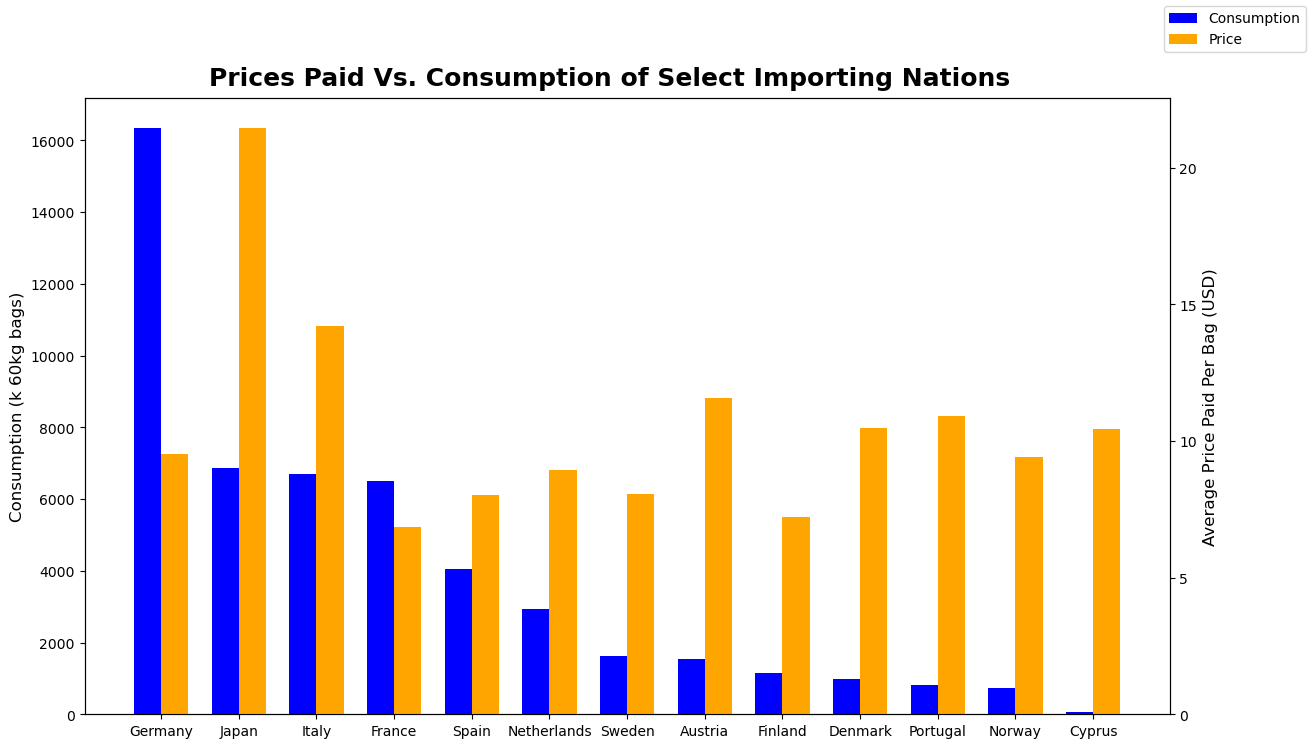

In [50]:
fig , ax = plt.subplots(figsize=(14, 8))

x=np.arange(len(price_cons))
width=0.35

ax.bar(
    x-width/2,
    price_cons["Imports"],
    width=width,
    color = "blue",
    label="Consumption"
)
ax.set_ylabel("Consumption (k 60kg bags)", fontsize=12)

ax2=ax.twinx()

ax2.bar(
    x+width/2,
    price_cons["Price"],
    width=width,
    color = "orange",
    label="Price"
)
ax2.set_ylabel("Average Price Paid Per Bag (USD)", fontsize=12)

fig.legend()
ax.set_xticks(x)
ax.set_xticklabels(price_cons.country)

fig.suptitle("Prices Paid Vs. Consumption of Select Importing Nations", fontsize=18,fontweight="bold",y=0.92)